In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model, preprocessing, tree
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt #Matplotlib 
from matplotlib import style #style

df =pd.read_csv('C:/Users/julie/Desktop/Data science/Datasets/forestfires.csv', na_values=['NA'])

In [2]:
print (df.shape) #768x10
print (df.head(4))
print (df.describe())

(517, 13)
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   

In [3]:
print(df.dtypes)

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object


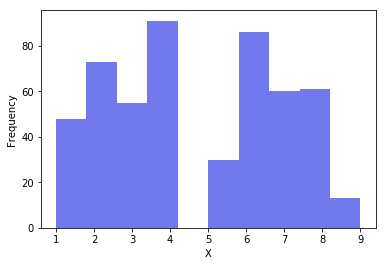

In [4]:
#X
plt.figure()
plt.hist(df.X, color = '#3541e5', alpha = 0.7) 
plt.xlabel('X')
plt.ylabel('Frequency')
plt.grid(False)

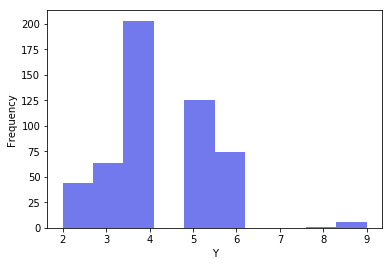

In [5]:
#Y
plt.figure()
plt.hist(df.Y, color = '#3541e5', alpha = 0.7) 
plt.xlabel('Y')
plt.ylabel('Frequency')
plt.grid(False)

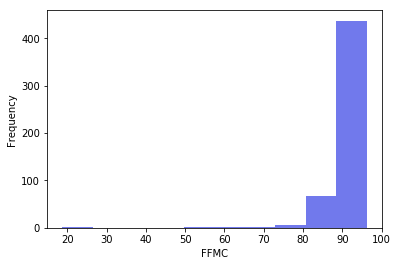

In [6]:
#FFMC
plt.figure()
plt.hist(df.FFMC, color = '#3541e5', alpha = 0.7) 
plt.xlabel('FFMC')
plt.ylabel('Frequency')
plt.grid(False)

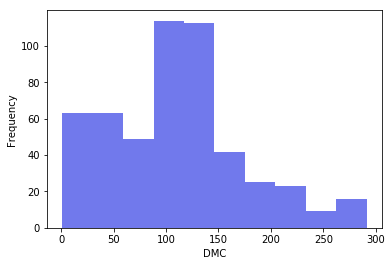

In [7]:
#DMC
plt.figure()
plt.hist(df.DMC, color = '#3541e5', alpha = 0.7) 
plt.xlabel('DMC')
plt.ylabel('Frequency')
plt.grid(False)

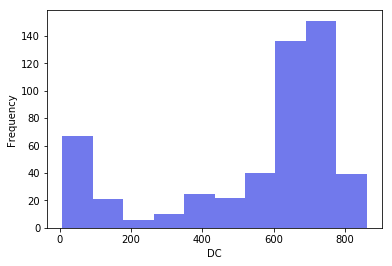

In [8]:
#DC
plt.figure()
plt.hist(df.DC, color = '#3541e5', alpha = 0.7) 
plt.xlabel('DC')
plt.ylabel('Frequency')
plt.grid(False)

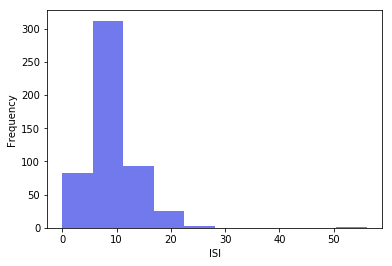

In [9]:
#ISI
plt.figure()
plt.hist(df.ISI, color = '#3541e5', alpha = 0.7) 
plt.xlabel('ISI')
plt.ylabel('Frequency')
plt.grid(False)

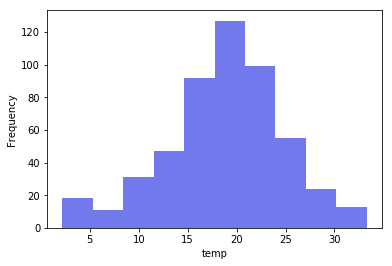

In [10]:
#temp
plt.figure()
plt.hist(df.temp, color = '#3541e5', alpha = 0.7) 
plt.xlabel('temp')
plt.ylabel('Frequency')
plt.grid(False)

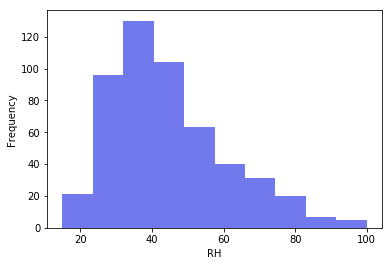

In [11]:
#RH
plt.figure()
plt.hist(df.RH, color = '#3541e5', alpha = 0.7) 
plt.xlabel('RH')
plt.ylabel('Frequency')
plt.grid(False)

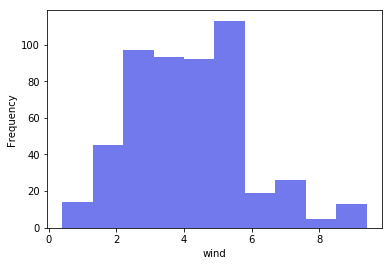

In [12]:
#wind
plt.figure()
plt.hist(df.wind, color = '#3541e5', alpha = 0.7) 
plt.xlabel('wind')
plt.ylabel('Frequency')
plt.grid(False)

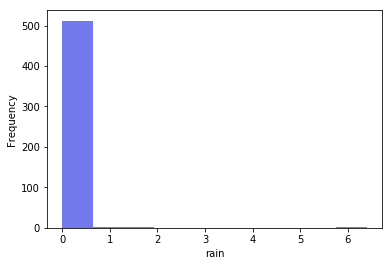

In [13]:
#Rain
plt.figure()
plt.hist(df.rain, color = '#3541e5', alpha = 0.7) 
plt.xlabel('rain')
plt.ylabel('Frequency')
plt.grid(False)

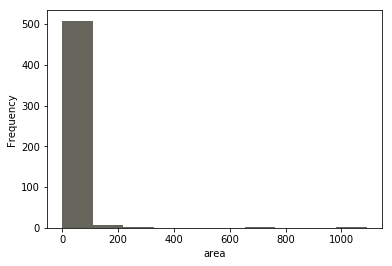

In [14]:
#area
plt.figure()
plt.hist(df.area, color = '#242416', alpha = 0.7) 
plt.xlabel('area')
plt.ylabel('Frequency')
plt.grid(False)

In [15]:
print(df.dtypes)

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object


In [16]:
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [17]:
x_values = list(df['X'])
y_values = list(df['Y'])

loc_values = []

for index in range(0, len(x_values)):
    temp_value = []

    temp_value.append(x_values[index])
    temp_value.append(y_values[index])
    loc_values.append(temp_value)

In [18]:
month_values = list(df['month'])
day_values = list(df['day'])

ffmc_values = list(df['FFMC'])
dmc_values = list(df['DMC'])
dc_values = list(df['DC'])
isi_values = list(df['ISI'])

temp_values = list(df['temp'])
rh_values = list(df['RH'])
wind_values = list(df['wind'])
rain_values = list(df['rain'])

area_values = list(df['area'])

In [19]:

attribute_list = []

for index in range(0, len(x_values)):
    temp_list = []
    
    temp_list.append(x_values[index])
    temp_list.append(y_values[index])
    
    temp_list.append(month_values[index])
    temp_list.append(day_values[index])

    temp_list.append(ffmc_values[index])
    temp_list.append(dmc_values[index])
    temp_list.append(dc_values[index])
    temp_list.append(isi_values[index])

    temp_list.append(temp_values[index])
    temp_list.append(rh_values[index])
    temp_list.append(wind_values[index])
    temp_list.append(rain_values[index])
    
    attribute_list.append(temp_list)

In [20]:
n_x_values = preprocessing.normalize([x_values])[0]
n_y_values = preprocessing.normalize([y_values])[0]

n_month_values = preprocessing.normalize([month_values])[0]
n_day_values = preprocessing.normalize([day_values])[0]

n_ffmc_values = preprocessing.normalize([ffmc_values])[0]
n_dmc_values = preprocessing.normalize([dmc_values])[0]
n_dc_values = preprocessing.normalize([dc_values])[0]
n_isi_values = preprocessing.normalize([isi_values])[0]

n_temp_values = preprocessing.normalize([temp_values])[0]
n_rh_values = preprocessing.normalize([rh_values])[0]
n_wind_values = preprocessing.normalize([wind_values])[0]
n_rain_values = preprocessing.normalize([rain_values])[0]

n_area_values = preprocessing.normalize([area_values])[0]
n_attribute_list = []

for index in range(0, len(n_x_values)):
    temp_list = []
    
    temp_list.append(n_x_values[index])
    temp_list.append(n_y_values[index])
    
    temp_list.append(n_month_values[index])
    temp_list.append(n_day_values[index])

    temp_list.append(n_ffmc_values[index])
    temp_list.append(n_dmc_values[index])
    temp_list.append(n_dc_values[index])
    temp_list.append(n_isi_values[index])

    temp_list.append(n_temp_values[index])
    temp_list.append(n_rh_values[index])
    temp_list.append(n_wind_values[index])
    temp_list.append(n_rain_values[index])
    
    n_attribute_list.append(temp_list)

In [21]:
X = attribute_list
y = area_values

In [22]:
#normalising data
#---------------
columns = ['X','month','day', 'Y', 'FFMC',
                'DMC', 'DC', 'ISI', 'temp', 'RH',  'wind', 'rain', 'area']
X = np.array(df[columns].values) #convert the dataset from a dataframe to an nd.numpy array
X = preprocessing.normalize(X, axis=0, norm= 'max')

In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
#attribute_list[:,0] = labelencoder_X.fit_transform(attribute_list[:,0])
onehotencoder = OneHotEncoder(categorical_features = [2,3])
attribute_list = onehotencoder.fit_transform(attribute_list).toarray()

In [24]:
#encode target variable
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 0)
mse_values = []
variance_score = []

In [26]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [27]:
LR = linear_model.SGDRegressor(max_iter=1000, tol=1e-3, penalty = 'l1')
model2= LR.fit(X_train, y_train)
predicted_y = model2.predict(X_test)
print("Mean squared error: ", mean_squared_error(y_test, predicted_y))
print('Variance score: %.2f' % r2_score(y_test, predicted_y))

mse_values.append(mean_squared_error(y_test, predicted_y))
variance_score.append(r2_score(y_test, predicted_y))

Mean squared error:  8760.711931357519
Variance score: -0.22


In [28]:
LR.score(X_train,y_train)

0.23099810139004562

In [29]:
print('intercept:', model2.intercept_)

intercept: [60.98622054]


In [30]:
print('slope:', model2.coef_)

slope: [-1.99605895  9.99844707  1.29990332  5.25835518  2.12197057 -2.82762365
 -2.34350805 -2.01965174 -8.49031989 -3.21391238  2.71108517  5.17019461
 32.95073571]


In [37]:
LR_scores = cross_val_score(LR, X_train, y_train, cv = 10)
print("Accuracy on training set: {:.3f}".format(LR.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(LR.score(X_test,y_test)))

Accuracy on training set: 0.231
Accuracy on test set: -0.217


In [31]:
decision_tree = tree.DecisionTreeRegressor(max_depth=3)

In [32]:
dt =decision_tree.fit(X_train, y_train)
predicted_y = decision_tree.predict(X_test)
print("Mean squared error: ", mean_squared_error(y_test, predicted_y))
print('Variance score: %.2f' % r2_score(y_test, predicted_y))

mse_values.append(mean_squared_error(y_test, predicted_y))
variance_score.append(r2_score(y_test, predicted_y))

Mean squared error:  60.81821022343232
Variance score: 0.99


In [33]:
decision_tree.score(X_test,y_test)

0.9915527754637292

In [34]:
decision_tree.score(X_train,y_train)

0.9913854978118337

In [35]:
dt.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [38]:
dt_scores = cross_val_score(decision_tree, X_train, y_train, cv = 10)
print("Accuracy on training set: {:.3f}".format(decision_tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(decision_tree.score(X_test,y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.992
